<a href="https://colab.research.google.com/github/rickchoudhary115/DL_TRAIN/blob/main/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset= pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [7]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dataset)

https://docs.google.com/spreadsheets/d/1tRRl0amsbvAzRlI-iwd22oZ7zoh2Q4YxI-J8ppExfjE/edit#gid=0


In [12]:
#cleaning process
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
  review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
  review = review.lower()
  review=review.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set (all_stopwords)]
  review= ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
display(corpus)

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [22]:
from sklearn.feature_extraction.text import  CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values
len(X[0])

1566

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB  #try with other process
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55 42]
 [12 91]]


0.73

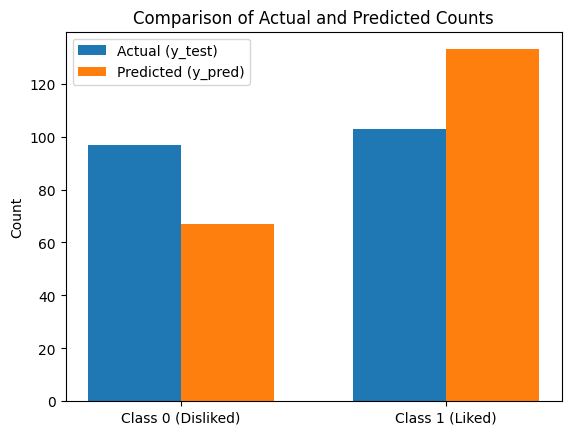

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Get counts for actual and predicted values
y_test_counts = np.bincount(y_test)
y_pred_counts = np.bincount(y_pred)

# Ensure both arrays have counts for both classes (0 and 1)
if len(y_test_counts) == 1:
    y_test_counts = np.append(y_test_counts, 0)
if len(y_pred_counts) == 1:
    y_pred_counts = np.append(y_pred_counts, 0)


labels = ['Class 0 (Disliked)', 'Class 1 (Liked)']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test_counts, width, label='Actual (y_test)', color='#1f77b4') # A standard matplotlib color
rects2 = ax.bar(x + width/2, y_pred_counts, width, label='Predicted (y_pred)', color='#ff7f0e') # Another standard matplotlib color

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Comparison of Actual and Predicted Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()